# Logistic Regression

In [90]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the data

In [104]:
dirName = '../../data/'
fileName = dirName + 'training.csv'
data = pd.read_csv(fileName)

## Data Preprocessing

In [119]:
# replace missing values with NaN
# data = data.replace(-999.0, np.nan)

# learning data
X = data.copy()
del X['EventId']
del X['Weight']
del X['Label']
y = data['Label']
w = data['Weight']

### Splitting training set to - real training and training test

In [120]:
Xtrain = X[1:225000]
Xtest = X[-25000:]
ytrain = y[1:225000]
ytest = y[-25000:]
wtrain = w[1:225000]
wtest = w[-25000:]

## Logistic Regression

### Training

In [107]:
# imports
import numpy as np
from sklearn import linear_model

In [108]:
# model
logistic = linear_model.LogisticRegression(C=1e5)

In [109]:
# fit
logistic.fit(Xtrain, ytrain)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

## Validation

In [111]:
# validation
predicted = logistic.predict(Xtest)

In [113]:
# compute AMS
def ams(s, b):
    from math import sqrt,log
    if b==0:
        return 0

    return sqrt(2*((s+b+10)*log(1+float(s)/(b+10))-s))

In [139]:
# compute all measures
def validate(predicted, real, weights):
    sumsig = 0.
    sumbkg = 0.
    tp = 0.
    tn = 0.
    fp = 0.
    fn = 0.
    precision = 0.
    recall = 0.
    acc = 0.
    
    if (predicted.shape[0] != real.shape[0]):
        raise Exception
    
    for i in range(predicted.shape[0]):
        if predicted[i] == "s":
            if real[i] == "s":
                sumsig += weights[i]
                tp += 1
            else:
                sumbkg += weights[i]
                fp += 1
        else:
            if real[i] == "s":
                fn += 1
            else:
                tn += 1
    
    # calculate scores
    amsscore = ams(sumsig * 10, sumbkg * 10)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    acc = (tp + tn) / (tp + fp + tn + fn)
    f1score = (2 * precision * recall)/(precision + recall)

    printScores(tp, tn, fp, fn, precision, recall, acc, f1score, amsscore)
    
    return amsscore

In [122]:
def printScores(tp, tn, fp, fn, precision, recall, acc, f1score, amsscore):
    all = tp + tn + fp + fn
    print("TP: ", tp/all)
    print("TN: ", tn/all)
    print("FP: ", fp/all)
    print("FN: ", fn/all)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("Acc: ", acc)
    print("F1: ", f1score)
    print("AMS: ", amsscore)

In [140]:
validate(predicted, np.array(ytest), np.array(wtest))

TP:  0.1844
TN:  0.56416
FP:  0.09148
FN:  0.15996
Precision:  0.6684065535740177
Recall:  0.5354861191776048
Acc:  0.74856
F1:  0.5946085386302076
AMS:  2.0147979285683175


2.0147979285683175

In [276]:
barX = list(abs(logistic.coef_[0]))

In [277]:
barV = list(X.columns.values)
ind = np.arange(30)

([<matplotlib.axis.XTick at 0xc707ff9d68>,
 <a list of 30 Text xticklabel objects>)

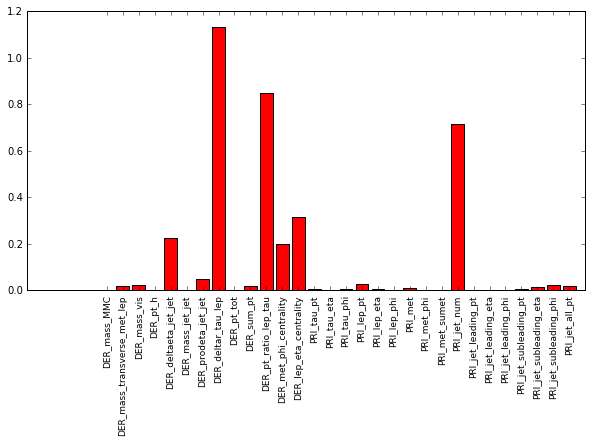

In [316]:
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, barX, align='center', color='r')
#plt.yscale('log')
ax.set_xticklabels(barV)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=90, fontsize=9)
plt.xticks(range(30))
#ax.xaxis.set_major_locator(1)

## Export for Kaggle

In [167]:
dirName = '../../data/'
fileName = dirName + 'test.csv'
dataRealTest = pd.read_csv(fileName)

# learning data
Xrealtest = dataRealTest.copy()
EventId = np.array(Xrealtest['EventId'])
del Xrealtest['EventId']

In [154]:
# prediction
predictedTest = logistic.predict(Xrealtest)
predictedP = logistic.predict_proba(Xrealtest)
predictedP = predictedP[:,0]

In [155]:
# make matrix
for i in range(len(predictedP)):
    

In [185]:
resultM = np.concatenate((np.matrix(EventId).T, np.matrix(predictedTest).T, np.matrix(predictedP).T), axis=1)

In [214]:
dt = np.dtype([('EventId', np.str_, 16), ('Label', np.str_, 2), ('Weight', np.float_, (4,))])
resultA = np.array(resultM);

In [204]:
resultA.view('S10,S10,f8')

TypeError: Cannot change data-type for object array.

In [224]:
alltestsorted = sorted(resultA, key=lambda entry: entry[2])

In [227]:
submissionfilename="submission_logistic.csv"
print("Final loop to write the submission file",submissionfilename)
outputfile=open(submissionfilename,"w")
outputfile.write("EventId,RankOrder,Class\n")
iid=headertest.index("EventId")
if iid<0:
    print("ERROR could not find variable EventId in test file")
    raise Exception # should not happen

rank=1 # kaggle wants to start at 1
for entry in alltestsorted:
    slabel = entry[1]

    outputfile.write(str(entry[iid])+",")
    outputfile.write(str(rank)+",")
    outputfile.write(slabel)            
    outputfile.write("\n")
    rank+=1


outputfile.close()
print(" You can now submit ",submissionfilename," to kaggle site")

Final loop to write the submission file submission_logistic.csv
 You can now submit  submission_logistic.csv  to kaggle site


Kaggle score AMS = 1.998